## RSCAM Assessment 2 - Solutions

## Neural Networks

In this lab we will learn a little about the training process for neural networks.  Before beginning this lab you *must* review the materials in Lectures 3 and 4 (see slides/video on the RSCAM Learn page).  The lab builds directly on the examples (XOR and SPD Classifier) which are introduced in the lecture.  If you get stuck, start by reviewing the slides as they may help.

One note about the problems this week.  In some of the examples there are parameters that influence the size of the computational task involved.  For example a large number of timesteps (or, equivalently, a small timestep on a fixed time interval) will mean that you have to do a lot of computational work.  Changing the number of nodes in a neural network or increasing the size of the data set will each add to the computational effort.  Remember that you can usually halt an execution using the "Kernel" menu in Jupyter Notebooks.  As you are performing the exercises always try to run smaller models first and build up to more complicated cases so that you can estimate the execution time.  Juggling the computational load with the accuracy obtained is a real life challenge that we confront whenever we are performing scientific computing tasks so it is not a bad thing to start to get used to it.

## Simulating logic gates
Binary logical operations like AND, OR, NAND, XOR... are the bread and butter of modern digital devices.  Although it is not of direct practical relevance to simulate their behavior using a neural network, it makes an interesting family of simple problems for learning about neural computation.   

As described in lecture, we can treat a logic gate as a two-input function f(x1,x2) where x1 and x2 are regarded as real numbers approximating binary states (0 or 1) and the output is also an approximation of a binary state.   Here we will use a two-layer network (one hidden layer with two nodes) and the sigmoidal function for both activation and output gates.   To use this within the setting of an Euler method we need to be able to compute a loss function L(theta), where theta is a vector of parameters of the network, and its negative gradient F=-nabla L.   These calculations are performed by the following code.
 

In [147]:
import numpy as np
import math as math
import matplotlib.pyplot as plt
import torch
font = {'family' : 'helvetica','size'   : 16}
plt.rc('font', **font)  # gives bigger fonts

def sig_act(s):
    return 1.0/(1.0+math.exp(-s))

def sig_act_prime(s):
    return math.exp(-s)/(1.0+math.exp(-s))**2

def p_force(theta):

# Calculate negative gradient of L2 loss function (and the loss) for 
# a two input function modelled with a two layer (2 hidden node) network
# using sigmoidal activation
# input - parameter vector *theta*
# output - negative gradient of L2 loss *F* and *loss*

    #change to weight, bias notation
    w11 = theta[0]; w12 = theta[1]; w21 = theta[2]; w22 =theta[3]
    w31 = theta[4]; w32 = theta[5]; w52 = theta[9];w51 = theta[8];w42 = theta[7];w41 = theta[6];
    b1 = theta[10]; b2=theta[11]; b3=theta[12]; b4=theta[13]; b5=theta[14]
    g = np.zeros((15,1));           # g = gradient - start with a zero vector 
    loss = 0                       # training loss
    
    for i in range(len(X)):
        x1 = combain[i][0]; x2 = combain[i][1]; c = combain[i][2];
   
        # calculate intermediates and output of network
        u1 = w11*x1 + w12*x2 + b1
        u2 = w21*x1 + w22*x2 + b2
        
        u3 = w31*sig_act(u1) + w32*sig_act(u1) + b3
        u4 = w41*sig_act(u2) + w42*sig_act(u2) + b4
      
        z1 = sig_act(u3)            # hidden node outputs
        z2 = sig_act(u4)
        u5 = w51*z1 + w52*z2 +b5    # 2nd layer
        
        out = sig_act(u5)
        res = c-out
        loss = loss + res**2        # update the L2 loss
        
        # now calculate the loss gradient components in reverse order
        h5 = -2*res*sig_act_prime(u5) 
        
        g[14] += h5                  # deriv with respect to bias b5
        g[9] += h5*z2               # wrt w52
        g[8] += h5*z1               # wrt w51
        
        h4 = h5* sig_act_prime(u4)  # multipliers
        h3 = h5* sig_act_prime(u3)
        
        g[13] += h4*w52             # wrt b4
        g[12] += h3*w51              # wrt b3
        
        g[7] += h4*w52*sig_act(u2)   # wrt w42
        g[6] += h4*w52*sig_act(u1)   # wrt w41
        g[5] += h3*w51*sig_act(u2)   # wrt w32
        g[4] += h3*w51*sig_act(u1)   # wrt w31
        
        
         
        h2 = h4* sig_act_prime(u2)  # multipliers
        h1 = h3* sig_act_prime(u1)
        
        g[11] += h2*(w41+w42)             #wrt b2
        g[10] += h1*(w31+w32)              #wrt b1
        
        
        g[3] += h2*w32*x2           # wrt w22
        g[2] += h2*w32*x1           # wrt w21
        g[1] += h1*w31*x2           # wrt w12
        g[0] += h1*w31*x1           # wrt w11

# negate the gradient to get the descent direction

    F = -g

    return F,loss

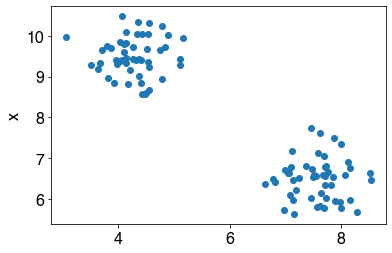

In [5]:
import sklearn
from sklearn.datasets import make_blobs
X, Y =make_blobs(n_samples=100, n_features=2, centers=2 , cluster_std=0.5,
center_box=(1, 10.0), shuffle=True, random_state=42)
# Y = np.expand_dims(Y,axis=1)
combain = np.column_stack((X,Y))
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('')
plt.ylabel('x')
plt.show()

In [ ]:
combain.shape

In [89]:
import random
rng = np.random.default_rng()
def p_force_sgd(theta,N):
    
    
    w11 = theta[0]; w12 = theta[1]; w21 = theta[2]; w22 =theta[3]
    w31 = theta[4]; w32 = theta[5]; w52 = theta[9];w51 = theta[8];w42 = theta[7];w41 = theta[6];
    b1 = theta[10]; b2=theta[11]; b3=theta[12]; b4=theta[13]; b5=theta[14]
    g = np.zeros((15,1));           # g = gradient - start with a zero vector 
    loss = 0                       # training loss
    
    
    combain_1 = rng.choice(combain,N,replace = False)
    for i in range(len(combain_1)):
        x1 = combain_1[i][1]; x2 = combain_1[i][1]; c = combain_1[i][2];

        # calculate intermediates and output of network
        u1 = w11*x1 + w12*x2 + b1
        u2 = w21*x1 + w22*x2 + b2

        u3 = w31*sig_act(u1) + w32*sig_act(u1) + b3
        u4 = w41*sig_act(u2) + w42*sig_act(u2) + b4

        z1 = sig_act(u3)            # hidden node outputs
        z2 = sig_act(u4)
        u5 = w51*z1 + w52*z2 +b5    # 2nd layer

        out = sig_act(u5)
        res = c-out
        loss = loss + res**2        # update the L2 loss

        # now calculate the loss gradient components in reverse order
        h5 = -2*res*sig_act_prime(u5) 

        g[14] += h5                  # deriv with respect to bias b5
        g[9] += h5*z2               # wrt w52
        g[8] += h5*z1               # wrt w51

        h4 = h5* sig_act_prime(u4)  # multipliers
        h3 = h5* sig_act_prime(u3)

        g[13] += h4*w52             # wrt b4
        g[12] += h3*w51              # wrt b3

        g[7] += h4*w52*sig_act(u2)   # wrt w42
        g[6] += h4*w52*sig_act(u1)   # wrt w41
        g[5] += h3*w51*sig_act(u2)   # wrt w32
        g[4] += h3*w51*sig_act(u1)   # wrt w31



        h2 = h4* sig_act_prime(u2)  # multipliers
        h1 = h3* sig_act_prime(u1)

        g[11] += h2*(w41+w42)             #wrt b2
        g[10] += h1*(w31+w32)              #wrt b1


        g[3] += h2*w32*x2           # wrt w22
        g[2] += h2*w32*x1           # wrt w21
        g[1] += h1*w31*x2           # wrt w12
        g[0] += h1*w31*x1           # wrt w11

# negate the gradient to get the descent direction

    F = -g/N

    return F,loss

In [90]:
def Euler(q_n, h, vector_field):
# computes a step using Euler's method for the given vector field
    F,loss = vector_field(q_n)
    return q_n + h*F, loss


In [93]:
def Euler_SGD(q_n, h, vector_field,N):
# computes a step using Euler's method for the given vector field
    F,loss = vector_field(q_n,N)
    return q_n + h*F, loss



In [105]:
def compute_trajectory( q0, Nsteps, h,  step_function, vector_field):
# computes a trajectory of length *Nsteps*
# for a differential equation defined by *vector_field*
# starting from a given initial condition *q0*
# using a given method defined by *step_function*
# with stepsize *h*
#
# outputs independent variable values *t_traj*, 
# trajectory *q_traj* whose jth column is the solution at time level j

    # initialize trajectory
    q_traj = [q0]; t_traj = [0]
    F,loss = vector_field(q0)
    loss_traj = [loss]

    # starting values
    q = q0; t = 0
    
    # loop
    for n in range(Nsteps):
        # calculate next step using provided stepping function
        q,loss  = step_function(q, h,  vector_field)
        t +=  h

        # update trajectory
        q_traj.append(q)
        t_traj.append(t)
        loss_traj.append(loss)

    return q_traj, t_traj, loss_traj

In [106]:
def compute_trajectory_SGD( q0, Nsteps, h,  step_function, vector_field,N):
# computes a trajectory of length *Nsteps*
# for a differential equation defined by *vector_field*
# starting from a given initial condition *q0*
# using a given method defined by *step_function*
# with stepsize *h*
#
# outputs independent variable values *t_traj*, 
# trajectory *q_traj* whose jth column is the solution at time level j

    # initialize trajectory
    q_traj = [q0]; t_traj = [0]
    F,loss = vector_field(q0,N)
    loss_traj = [loss]

    # starting values
    q = q0; t = 0
    
    # loop
    for n in range(Nsteps):
        # calculate next step using provided stepping function
        q,loss  = step_function(q, h,  vector_field,N)
        t +=  h

        # update trajectory
        q_traj.append(q)
        t_traj.append(t)
        loss_traj.append(loss)

    return q_traj, t_traj, loss_traj

In [122]:
random.seed(10)
q0 = np.random.random((15,1))

In [123]:
h1 = 0.001
Nsteps1 = 10000
vector_field = p_force
step_function = Euler
q_traj1, t_traj1, loss_traj1 = compute_trajectory( q0, Nsteps1,h1,step_function, vector_field)

In [130]:
N=20
q_trajsgd, t_trajsgd, loss_trajsgd = compute_trajectory_SGD( q0, Nsteps1,h1,Euler_SGD, p_force_sgd,N)

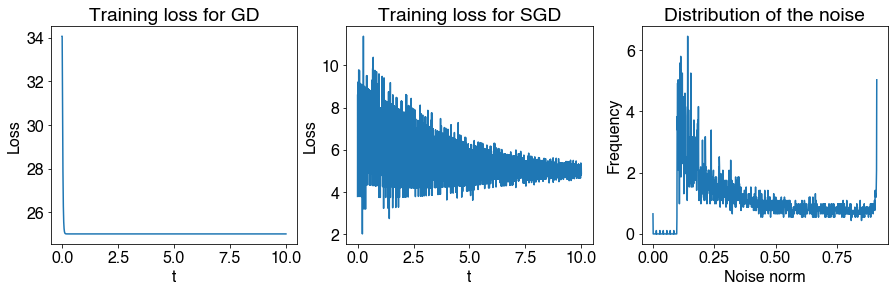

In [131]:
figure = plt.figure(figsize = [15,4])
plt.subplot(1,3,1)
plt.plot(t_traj1,loss_traj1)
plt.title('Training loss for GD')
plt.xlabel('t')
plt.ylabel('Loss')

plt.subplot(1,3,2)
plt.plot(t_trajsgd,loss_trajsgd)
plt.title('Training loss for SGD')
plt.xlabel('t')
plt.ylabel('Loss')

# a=np.array(q_traj1)-np.array(q_trajsgd)
plt.subplot(1,3,3)
n = np.zeros(len(q_traj1))
for i in range(len(q_traj1)-5):
    n[i] = (np.linalg.norm(q_traj1[i]-q_trajsgd[i]))
a,b = np.histogram(n,bins=1000,density=True)
plt.plot(b[:-1],a)
plt.title('Distribution of the noise')
plt.xlabel('Noise norm')
plt.ylabel('Frequency')
plt.show()